In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

In [32]:
# Load dataset
data = pd.read_csv("IMDB Dataset.csv")  # Adjust to your file path



In [33]:
data['review_length'] = data['review'].apply(len)  # Feature 1
data['word_count'] = data['review'].apply(lambda x: len(x.split()))  # Feature 2
data['unique_words'] = data['review'].apply(lambda x: len(set(x.split())))  # Feature 3
data['avg_word_length'] = data['review'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()) if len(x.split()) > 0 else 0)  # Avg word length

data.head()

,review,sentiment,review_length,word_count,unique_words,avg_word_length
0,One of the other reviewers has mentioned that ...,positive,1761,307,208,4.739414
1,A wonderful little production. <br /><br />The...,positive,998,162,114,5.166667
2,I thought this was a wonderful way to spend ti...,positive,926,166,121,4.584337
3,Basically there's a family where a little boy ...,negative,748,138,96,4.427536
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230,152,4.730435


In [34]:
reviews = data['review']
sentiments = data['sentiment']



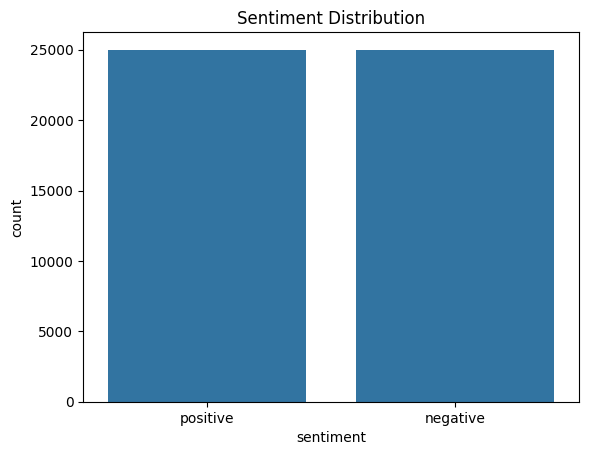

In [36]:
# EDA Visualizations
# 1. Sentiment Distribution
sns.countplot(x='sentiment', data=data)
plt.title("Sentiment Distribution"); 
plt.show()



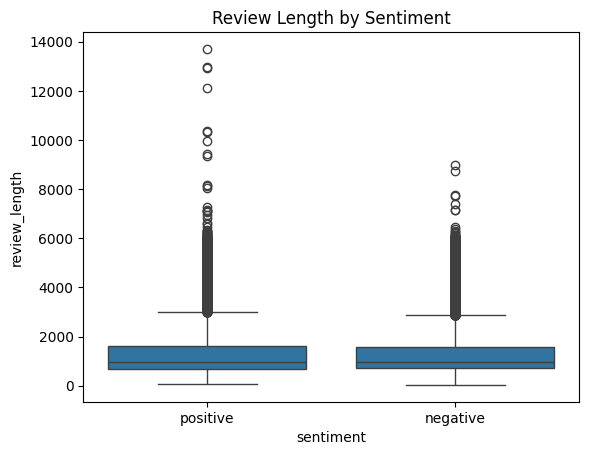

In [37]:
# 2. Review Length by Sentiment
sns.boxplot(x='sentiment', y='review_length', data=data)
plt.title("Review Length by Sentiment"); plt.show()


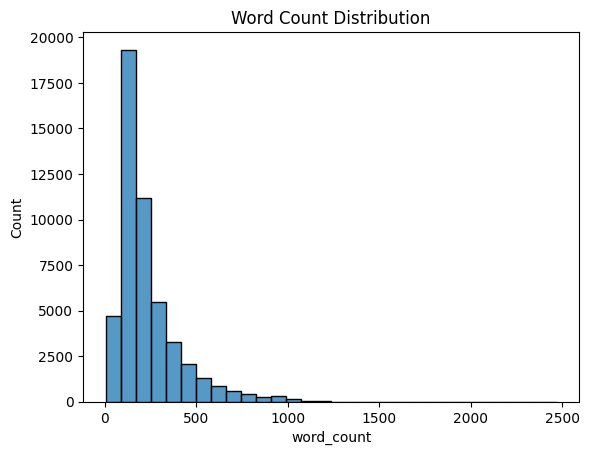

In [38]:
# 3. Word Count Histogram
sns.histplot(data['word_count'], bins=30)
plt.title("Word Count Distribution"); plt.show()



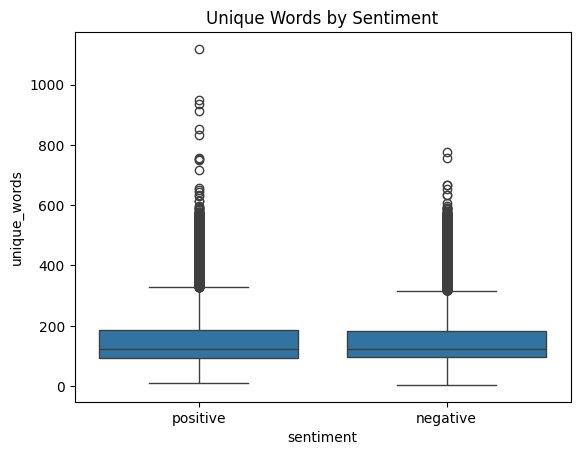

In [39]:
# 4. Unique Words by Sentiment
sns.boxplot(x='sentiment', y='unique_words', data=data)
plt.title("Unique Words by Sentiment"); plt.show()



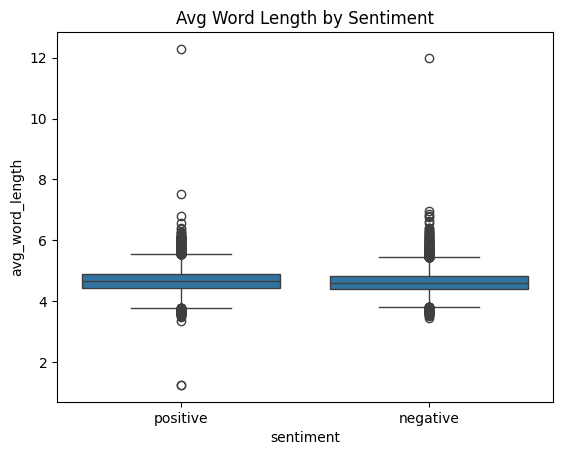

In [40]:
# 5. Avg Word Length by Sentiment
sns.boxplot(x='sentiment', y='avg_word_length', data=data)
plt.title("Avg Word Length by Sentiment"); plt.show()

In [ ]:
# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english')),
    ('scaler', StandardScaler(with_mean=False)),  # Sparse-compatible scaling
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])



In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)



39087    That's what I kept asking myself during the ma...
30893    I did not watch the entire movie. I could not ...
45278    A touching love story reminiscent of In the M...
16398    This latter-day Fulci schlocker is a totally a...
13653    First of all, I firmly believe that Norwegian ...
Name: review, dtype: object

In [21]:
# Train model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [23]:
# Predict and evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test,y_pred)


In [24]:
# Output results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.861
Confusion Matrix:
[[4226  735]
 [ 655 4384]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4961
    positive       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



<Axes: >

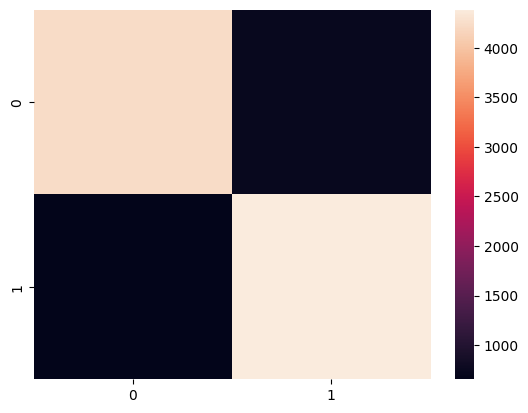

In [25]:
sns.heatmap(conf_matrix)